#8. Twitter Sentiment Analysis Example

이번 시간에는 Twitter의 트윗들을 실시간으로 모아 메세지에 담긴 감정 분석(sentimental analysis)을 해보도록 합니다.
이 튜토리얼의 핵심은 다음과 같습니다:
  - (실시간으로) 트윗을 수합
  - 분석: 최빈 단어, 해시태그 등 추리기
  - Positive, negative, neutral 세 가지 class로 감정 분류




##8.1. Warming Up with `vaderSentiment`

트윗에 담긴 감정 분석을 위해서 `vaderSentiment` 라이브러리를 사용가능하게 합니다. !pip install 명령어는 사용 중인 Colab 서버의 가상머신에 라이브러리를 설치할 수 있게 합니다.

In [0]:
!pip install vaderSentiment

설치한 라이브러리를 import하고, 분석기(`SentimentIntensityAnalyzer`)를 초기화 합니다.

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

다음 문장들을 입력하며, vader 분석기의 아웃풋을 살펴 봅니다.

* "I love fried chickens"
* "I hate this skirt"

In [0]:
analyser.polarity_scores("I love fried chickens")

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.323, 'pos': 0.677}

긍정 점수가 67.7%, 중립 점수가 32.3% 라고 판정되었습니다.

In [0]:
analyser.polarity_scores("I hate this skirt")

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

이번엔 부정 점수가 64.9%, 중립 점수가 35.1% 라고 판정되었습니다.

아웃풋의 가장 전면에 등장하는 'compound' 항목은 복합 점수를 나타내며, 다음과 같은 range를 갖습니다.
- The 'Compound' score has a range of [-1, 1], being:
 - [-1 to 0): negative
 - [0]: neutral
 -(0 to +1]: positive

위 ranges를 이용하여 일반적인 문장에 담긴 감정을 긍정/부정으로 분류하는 함수를 작성합니다.

In [0]:
def sentiment_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

함수가 잘 작동하는지 확인해볼까요?

In [0]:
print(sentiment_scores('I like my life in Handong'))
print(sentiment_scores('I hate being rude'))
print(sentiment_scores('Mr. Scott works at Dunder Mifflin'))

1
-1
0


### Hadling Non-English Languages
트위터는 전 세계인이 사용하는 서비스죠? Google Translator를 사용하여 트윗들을 영어로 자동 변환하도록 하겠습니다.

In [0]:
!pip install googletrans
from googletrans import Translator
translator = Translator()


  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15776 sha256=4a1d177d1c4796ce5a0292b63f9ea3b898af173e7e234079dee57def1a06c765
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


다음 메세지를 영어로 번역해볼까요?

In [0]:
translator.translate('hola, todo bien? gracias!').text

'hello, all right? thanks!'

In [0]:
translator.translate('편의점이 어디에 있나요?').text

'Where is the convenience store?'

이제 `sentiment_scores()` 함수를 다시 확장하여, 영어로 작성된 트윗인지 나타내는 en 파라메터를 추가합니다.

In [0]:
def sentiment_scores(text, en=True):
  if en:
    trans = text
  else:
    trans = translator.translate(text).text
  score = analyser.polarity_scores(trans)
  lb = score['compound']
  if lb >= 0.05:
    return 1
  elif (lb > -0.05) and (lb < 0.05):
    return 0
  else:
    return -1

##8.2. Gathering Tweets

이제 트윗을 모을 차례입니다. `tweepy` 라이브러리를 설치합니다.

In [0]:
!pip install tweepy

tweepy를 import하고 개발자 어카운트 정보를 입력하여, 트위터 API를 사용할 수 있도록 연결합니다.

In [0]:
import tweepy

consumer_key = 'ENTER_YOUR_ACCOUNT_INFO'
consumer_secret = 'ENTER_YOUR_ACCOUNT_INFO'
access_token = 'ENTER_YOUR_ACCOUNT_INFO'


access_token_secret = 'ENTER_YOUR_ACCOUNT_INFO'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#### 시팔이 하상욱

`tweepy` 라이브러리를 이용하여 **시팔이 하상욱**님의 가장 최근 5개 tweet들을 받아보겠습니다.

<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/twitter_ha_lp.png" width="500">


`api.user_timeline()` 함수의 첫 번째 파라메터로 트윗을 수집하고자하는 (target) 사용자의 트위터 어카운트를 기입합니다.

In [0]:
tweets = api.user_timeline('@TYPE4GRAPHIC', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

이런저런 인연들을 겪고 나니, 정말 함께 하고 싶은 사람은 ‘내가 좋아하는 사람’도 ‘나를 좋아하는 사람’도 아니었다. 내가 나를 좋아할 수 있게 만들어 주는 사람이었다.

좋아하는 일이라는 건 마냥 즐거운 일인 줄 알았는데, 힘들고 괴로운 날이 있더라도 계속 하고 싶다면 그게 좋아하는 일인 것 같다.

생각을 잊지 않으려고 메모를 시작했는데
메모를 시작했다는 사실을 자꾸만 잊는다

RT @NeWiver_: ????? https://t.co/alb0NKFd3d

과소비 하고 싶다. 당신과 소비.



하상욱 시인의 최근 트윗이 잘 받아지나요?

지금까지 내용이 잘 실행되었다면, 위 코드를 일반화 하여 아래와 같은 `list_tweets()` 함수를 작성합니다.

In [0]:
def list_tweets(user_id, count, prt=False):
  tweets = api.user_timeline("@" + user_id, count=count, tweet_mode='extended')
  tw = []
  for t in tweets:
    tw.append(t.full_text)
    if prt:
      print(t.full_text)
      print()
  return tw

## 8.3. Twitter Sentiment Analysis

#### 도널드 트럼프 미국 대통령

미국 대통령 **도널드 트럼프**님은 어떤 이야기를 하고 계신가요? 그분의 계정은 `@realDonaldTrump` 입니다.

<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/twitter_trump_lp.png" width="500">

`list_tweets()` 함수를 사용하여 `realDonaldTrump` 계정의 최근 200개 트윗을 불러옵니다

In [0]:
user_id = 'realDonaldTrump'
count = 200
tw_trump = list_tweets(user_id, count)

최근 트윗 중 하나를 열어볼까요? (index 2번으로 리턴된 트윗 `tw_trump[2]`; *i.e.*, 3번 째 최근 트윗)

In [0]:
tw_trump[2]

'RT @realDonaldTrump: We are helping Apple all of the time on TRADE and so many other issues, and yet they refuse to unlock phones used by k…'

앞서 작성했던 sentiment_score() 함수로 이 트윗에 담긴 감정을 판정해 봅니다.

In [0]:
sentiment_scores(tw_trump[2])

0

Q: 어떤 판정이 나왔나요? 동의 하나요?

#### Visualize the Analysis Result

트위터를 통한 감정 판정 내용을 시각화하려 합니다. 다음 함수들을 추가로 정의해 줍니다.

In [0]:
import seaborn as sns

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
      input_txt = re.sub(i, '', input_txt)        
  return input_txt

def clean_tweets(lst):
  # remove twitter Return handles (RT @xxx:)
  lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
  # remove twitter handles (@xxx)
  lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
  # remove URL links (httpxxx)
  lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
  # remove special characters, numbers, punctuations (except for #)
  lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
  return lst

def plot_tweets(lst, title='Tweets Sentiment', engl=True):
  sents = []
  for tw in lst:
    try:
      st = sentiment_scores(tw, engl)
      sents.append(st)
    except:
      sents.append(0)
  ax = sns.distplot(sents, kde=False, bins=3)
  ax.set(xlabel='Negative                Neutral                 Positive',
         ylabel='#Tweets',
         title="Tweets of @"+title)
  return sents

200개의 트윗을 통해 나타난 트럼프 대통령의 감정 분포는 어떨까요?

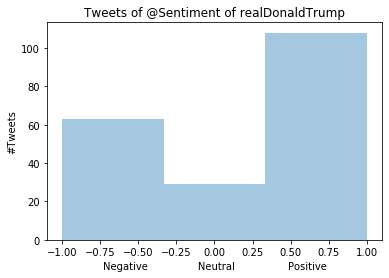

In [0]:
scores_tw_trump = plot_tweets(tw_trump, 'Sentiment of ' + user_id)

#### 빌 게이츠 (Bill & Melinda Gates Foundation)

또 다른 유명인의 트위터를 분석해볼까요?

<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/twitter_gates_lp.png" width="500">

먼저 이분의 트윗을 통해 나타난 감정을 판정하여 시각화 해봅니다. 어떠한 분포가 관찰되나요? 트럼프 대통령의 트윗 분석 내용과 비교하여, 어떠한 차이가 보이나요?

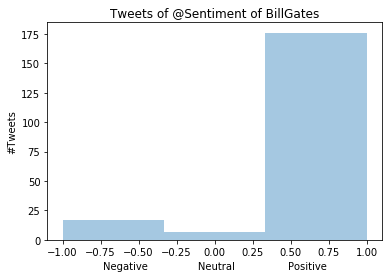

In [0]:
user_id = 'BillGates'
tw_gates = list_tweets(user_id, count)
scores_tw_gates = plot_tweets(tw_gates, 'Sentiment of ' + user_id)

## 8.4. Tweet Anaylsis with Word Cloud

이번엔 워드 크라우드를 만들며 수합된 트윗 내용을 시각화해봅니다.

In [0]:
!pip install wordcloud
import wordcloud as WordCloud

다음 함수를 입력하여 수합된 트윗들로부터 간편하게 워드 클라우드를 그려볼 수 있는 준비를 합니다.

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  stopwords.add('https')
  stopwords.add('co')
  stopwords.add('RT')
  all_words = ' '.join([text for text in wd_list])
  if len(all_words) == 0:
    return

  wcloud = WordCloud(background_color='white',
                     stopwords=stopwords,
                     width=1600,
                     height=800,
                    #  random_state=21,
                     colormap='jet',
                     max_words=100,
                     max_font_size=200).generate(all_words)
  plt.figure(figsize=(12, 10))
  plt.axis('off')
  plt.imshow(wcloud, interpolation="bilinear");

#### Analyze the Tweets with Word Clouds

먼저 트럼프 대통령의 트윗을 워드 크라우드로 요약해보겠습니다.

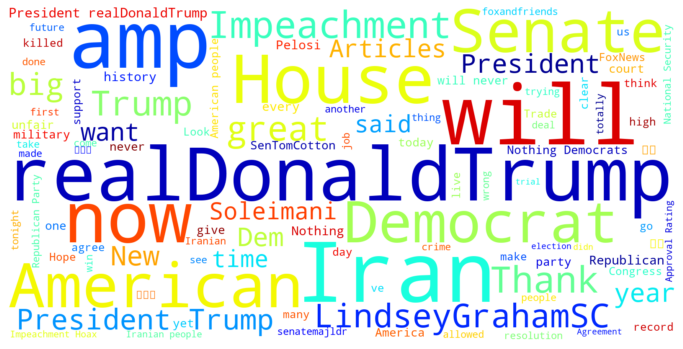

In [0]:
word_cloud(tw_trump)

가장 눈에 띄는 단어들은 무엇인가요?



빌 게이츠 대표의 트윗도 워드 크라우드로 표현해보겠습니다.

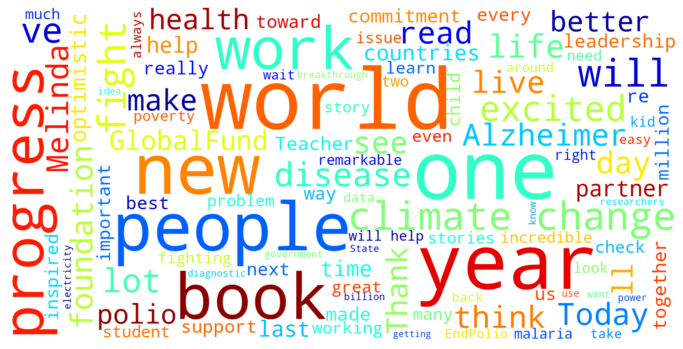

In [0]:
word_cloud(tw_gates)

어떤 단어들이 눈에 띄나요? 트럼프 대통령의 워드 크라우드와 비교해서, 어떠한 분석을 해볼 수 있나요? 두 사람의 워드 크라우드를 통해 나타난 차이를 문장 형태로 정리해볼 수 있나요?

#### 버락 오바마 전 미국 대통령

마지막으로 오바마 전 미국 대통령의 트위터로부터 워드 크라우드를 만들어 봅시다.

<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/twitter_obama_lp.png" width="500">

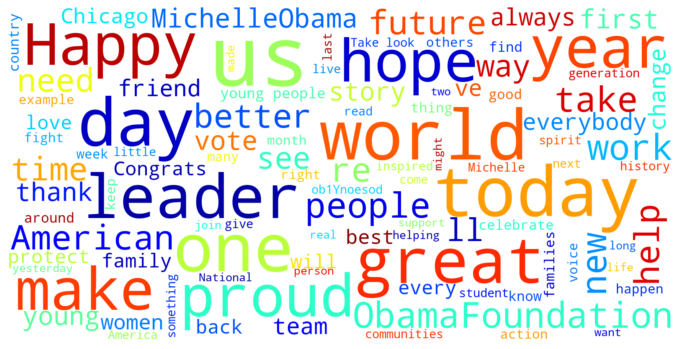

In [0]:
tw_obama = list_tweets('BarackObama', count)
word_cloud(tw_obama)

이번엔 어떤 단어들이 눈에 띄나요?

## 8.5. Elaborate the Clouds

이제 다음 그림 파일들을 이용하여 조금 더 스타일을 만들어 보겠습니다. 실루엣을 통해 누가 누구인지 파악이 되나요?

<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_trump.png" height="150">
&nbsp;
<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_gates.png" height="150">
&nbsp;
<img src="https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_obama.png" height="150">

다음 코드를 입력하여, 위의 실루엣을 mask로 사용하는 워드 크라우드를 그려보도록 하겠습니다.


In [0]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def word_cloud(wd_list, url=''):
  stopwords = set(STOPWORDS)
  stopwords.add('https')
  stopwords.add('co')
  all_words = ' '.join([text for text in wd_list])
  if len(all_words) == 0:
    return

  if url:
    response = requests.get(url)
    char_mask = np.array(Image.open(BytesIO(response.content)))
    image_colors = ImageColorGenerator(char_mask)

    wc = WordCloud(background_color="white", 
                   stopwords=stopwords,
                   width=800, 
                  #  height=400, 
                   max_words=100, 
                   mask=char_mask).generate(all_words)
    plt.imshow(wc.recolor(color_func=image_colors))

  else:
    wcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      width=1600,
                      height=800,
                      colormap='jet',
                      max_words=100,
                      max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wcloud, interpolation="bilinear");


완성된 코드를 사용해볼까요?

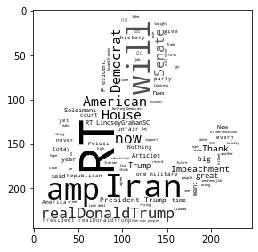

In [0]:
word_cloud(tw_trump, 
           'https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_trump.png')

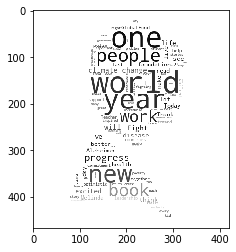

In [0]:
word_cloud(tw_gates, 
           'https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_gates.png')

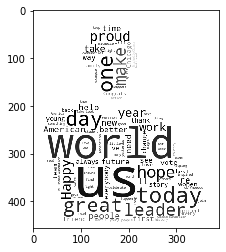

In [0]:
word_cloud(tw_obama, 
           'https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_obama.png')

## 8.6 Listening to the Stream of Tweets

이번 절에서는 전세계에서 입력되는 트위터의 내용을 실시간으로 모니터하며, 지정한 조건을 만족하는 트윗들을 자동으로 모아 분석하는 실습을 해봅니다.

먼저 다음 함수를 작성하여, 트위터를 지켜볼 준비를 합니다.

In [0]:
import csv, time

def twitter_stream_listener(file_name, filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
  
  class CustomStreamListener(tweepy.StreamListener):
    def __init__(self, time_limit):
      self.start_time = time.time()
      self.limit = time_limit
      self.n_twts = 0
      # self.saveFile = open('abcd.json', 'a')
      super(CustomStreamListener, self).__init__()

    def on_status(self, status):
      if (time.time() - self.start_time) < self.limit:

        
        self.n_twts = self.n_twts + 1
        
        if self.n_twts % 10 == 0:
          print(".", end="")
        
        if self.n_twts % 100 == 0:
          print(str(self.n_twts) + ' tweets received')

        # Writing status data
        with open(file_name, 'a') as f:
          writer = csv.writer(f)
          writer.writerow([status.author.screen_name, status.created_at,
                            status.text
                            ])
      else:
        print("\n\n[INFO] Closing file and ending streaming")
        return False

  def on_error(self, status_code):
    if status_code == 420:
      print('Encountered error code 420. Disconnecting the stream')
      # returning False in on_data disconnects the stream
      return False
    else:
      print('Encountered error with status code: {}'.format(status_code))
      return True  # Don't kill the stream

  def on_timeout(self):
    print('Timeout...')
    return True  # Don't kill the stream

  # Writing csv titles
  print('\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'.format(file_name, 
                                                                                        time_limit, filter_track))
  with open(file_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['author', 'date', 'text'])

  streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener(time_limit=time_limit))
  streamingAPI.filter(track=filter_track, 
                      follow=follow, 
                      locations=locations, 
                      languages=languages,
                      )
  f.close()

위 함수의 핵심 구문은 58번째 줄에 있습니다. 즉, `twitter_stream_listener()` 함수는 트위터가 제공하는 `filter()` API의 wrapper 입니다. `filter()`는 다음과 같은 파라메터를 필요로 합니다.

* track: 수집 조건으로 제시하는 키워드 입니다. 나열한 키워드를 포함한 트윗들이 리턴되어 옵니다.
* follow: 트윗을 남긴 사용자를 기반으로 트윗을 수집/리턴 합니다.
* location: 트윗이 이루어진 위치를 기반으로 트윗을 수집/리턴 합니다.
* language: 트윗에 사용된 언어를 기반으로 트윗을 수집/리턴 합니다.


#### **Monitoring the Tweets about BTS and Youtube**

작성한 코드를 사용하여 'bts'와 'youtube' 키워드를 포함하는 트윗을 분석해보겠습니다. 다음 코드를 실행하여 60초간 위의 키워드가 포함된 트윗들을 수집해봅니다.

In [0]:
filter_track = ['bts', 'youtube']
filename = 'tmp_tweets.csv'
twitter_stream_listener(filename, filter_track, languages=['en'], time_limit=60)


[INFO] Open file: [tmp_tweets.csv] and starting 60 seconds of streaming for ['bts', 'youtube']

..........100 tweets received
..........200 tweets received
..........300 tweets received
..........400 tweets received
..........500 tweets received
..........600 tweets received
..........700 tweets received
..........800 tweets received
..........900 tweets received
..........1000 tweets received


[INFO] Closing file and ending streaming


지난 1분 사이에 BTS에 대하여 얼마나 많은 트윗이 생성되고 있는지 확인했나요? 잊지 말아야할 점은 방금 모인 트윗들이 모두 영어로 작성된, BTS와 Youtube를 언급하고 있는 트윗이라는 사실입니다. 언어를 상관하지 않고 'BTS'를 언급하는 모든 트윗을 모으면, 더 많은 트윗을 모을 수도 있습니다.

일단, 수집된 트윗의 내용을 간단히 살펴보죠:

In [0]:
import pandas as pd
df_tweets = pd.read_csv(filename)
df_tweets.shape
df_tweets.head()

,author,date,text
0,chimoonb,2020-01-15 17:49:27,RT @ilsansqueen: i want the friendship bts has.
1,Randtastic,2020-01-15 17:49:27,Niggas come on the Internet and show how much ...
2,joeusaman,2020-01-15 17:49:27,Hollywood Joe/Web Slate 1/31/91 Crystal palace...
3,beatricelarion,2020-01-15 17:49:27,RT @soompi: #BTS’s “The Best Of BTS: Korea Edi...
4,Tora_Vantae,2020-01-15 17:49:27,"RT @ROLLING_KPOP: ""I always depended on someon..."


이제, 앞서 작성한 `plot_tweets()` 함수를 사용하여, 수합된 트윗에 담긴 감정을 분석해봅니다. 이때 감정 판정 내용을 df_tweets의 'sent' 컬럼에 넣어줍니다.

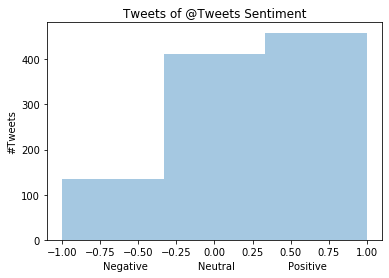

In [0]:
df_tweets['sent'] = plot_tweets(df_tweets.text)

위 코드를 수행하고 나면, df_tweets에 'sent'라는 컬럼이 추가된 것을 확인할 수 있습니다. sent의 값이 1인 트윗은 positive; 0은 neutral, -1은 negative하다고 판정된 트윗입니다.

In [0]:
df_tweets.head()

,author,date,text,sent
0,chimoonb,2020-01-15 17:49:27,RT @ilsansqueen: i want the friendship bts has.,1
1,Randtastic,2020-01-15 17:49:27,Niggas come on the Internet and show how much ...,-1
2,joeusaman,2020-01-15 17:49:27,Hollywood Joe/Web Slate 1/31/91 Crystal palace...,0
3,beatricelarion,2020-01-15 17:49:27,RT @soompi: #BTS’s “The Best Of BTS: Korea Edi...,1
4,Tora_Vantae,2020-01-15 17:49:27,"RT @ROLLING_KPOP: ""I always depended on someon...",1


이제 워드 크라우드도 만들어볼까요?

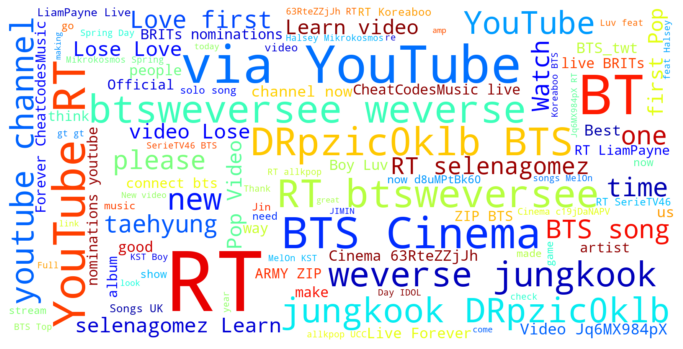

In [0]:
word_cloud(df_tweets.text)

## 8.7. Hashtag Analysis

해시태그는 트윗에 남겨진 짧은 메세지들의 속성을 파악하는 또 다른 척도로 활용될 수 있습니다. 이들 해시태그를 모아, 자주 등장하는 해시태그가 어떤 것들로 이루어져있는지 살펴보겠습니다.

다음 코드를 작성하여 해시태그를 수합합니다.

In [0]:
import re
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags




# extracting hashtags from positive tweets
htags_pos = hashtag_extract(df_tweets['text'][df_tweets['sent'] == 1])
# extracting hashtags from negative tweets
htags_neg = hashtag_extract(df_tweets['text'][df_tweets['sent'] == -1])
# unnesting list
htags_pos = sum(htags_pos,[])
htags_neg = sum(htags_neg,[])

다음 함수를 작성하여 수합된 해시태그를 시각화할 준비를 합니다.

In [0]:
import nltk
import warnings
warnings.filterwarnings("ignore")

def hist_freq_hashtags(df_hashtags, xlabel='', n_top=10):
  a = nltk.FreqDist(htags_pos)
  d = pd.DataFrame({'Hashtag': list(a.keys()),
                    'Count': list(a.values())})

  # Select 'n_top' most frequent tags
  d_freq = d.nlargest(columns='Count', n=n_top)
  
 
 
  display(d_freq.style.hide_index())
  plt.figure(figsize=(16,5))
  ax = sns.barplot(data=d_freq, x='Hashtag', y='Count')
  if xlabel:
    ax.set(xlabel=xlabel)
  ax.set(ylabel='Count')
  plt.xticks(rotation=60)
  plt.show()

이제 긍정적인 트윗에 붙어있던 해시태그들의 목록입니다. 어떤 태그들이 많은지 살펴볼까요? 평상 시 BTS의 활동에 관심있는 학생들은 이중에 의미있는 태그가 포함되어 있는지 이야기해줄 수 있나요?

Hashtag,Count
BTS,21
btsart,10
bts,10
btsfanart,10
kpopfana,10
Master,8
Expose2020,7
Connect_BTS,6
EXOSTREAMINGPARTY,6
EXO,6


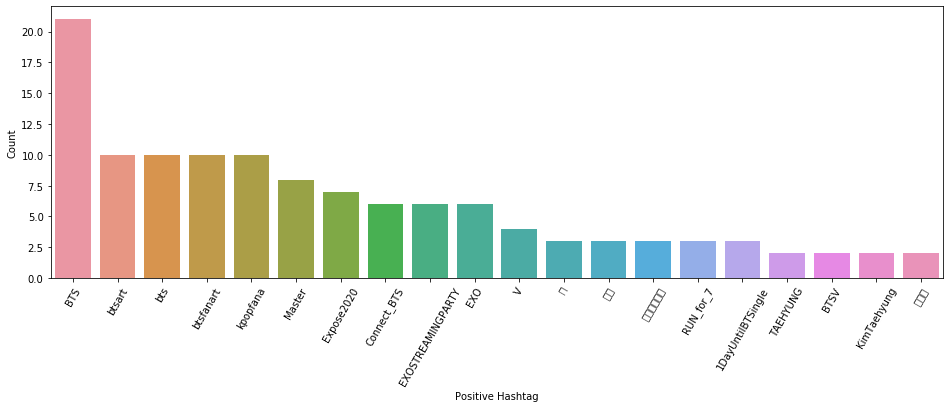

In [0]:
hist_freq_hashtags(htags_pos, 'Positive Hashtag', 20)

이번엔 부정적이라고 판정된 트윗에 붙어있던 해시태그 분포입니다. 이중에 혹시 의미있는 태그가 있나요?

Hashtag,Count
BTS,21
btsart,10
bts,10
btsfanart,10
kpopfana,10
Master,8
Expose2020,7
Connect_BTS,6
EXOSTREAMINGPARTY,6
EXO,6


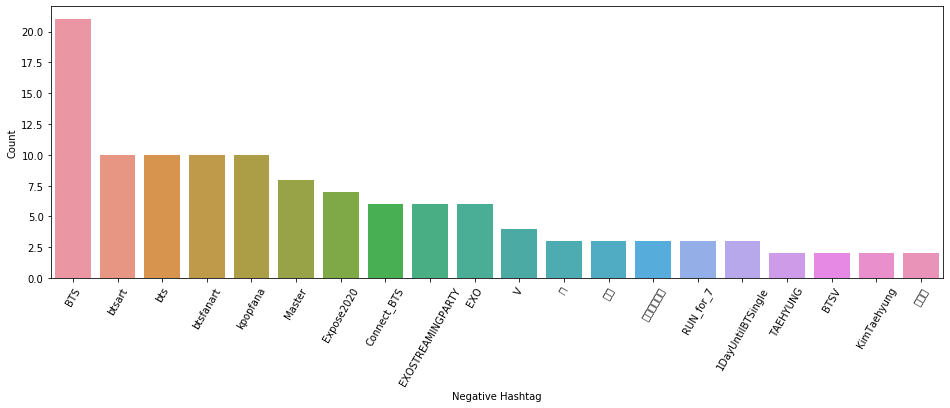

In [0]:
hist_freq_hashtags(htags_neg, 'Negative Hashtag', 20)

## References

* Rovai, Marcelo. *(Almost) Real-Time Twitter Sentiment Analysis with Tweep & Vader*. URL: https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c

* Parker, Kerry. *Creating word clouds with python*. URL: https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc